<a href="https://colab.research.google.com/github/liskibruh/EDA-on-Average-Temperatures-in-Cities-of-Pakistan/blob/main/Seequential_Model_Machine_learning_to_predict_survival_of_patients_with_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SET DETAILS
Source:

Provide the names, email addresses, institutions, and other contact information of the donors and creators of the data set.The original dataset version was collected by Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza (Government College University, Faisalabad, Pakistan) and made available by them on FigShare under the Attribution 4.0 International (CC BY 4.0: freedom to share and adapt the material) copyright in July 2017.

The current version of the dataset was elaborated by Davide Chicco (Krembil Research Institute, Toronto, Canada) and donated to the University of California Irvine Machine Learning Repository under the same Attribution 4.0 International (CC BY 4.0) copyright in January 2020. Davide Chicco can be reached at <davidechicco '@' davidechicco.it>

Data Set Information:

A detailed description of the dataset can be found in the Dataset section of the following paper:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). 

PAPER LINk: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Tab8



In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(dataset.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [ ]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
dataset.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
print("heart failure data set dimensions : {}".format(dataset.shape))

heart failure data set dimensions : (299, 13)


In [ ]:
dataset.groupby('DEATH_EVENT').size()

DEATH_EVENT
0    203
1     96
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8bc4ac450>,
      dtype=object)

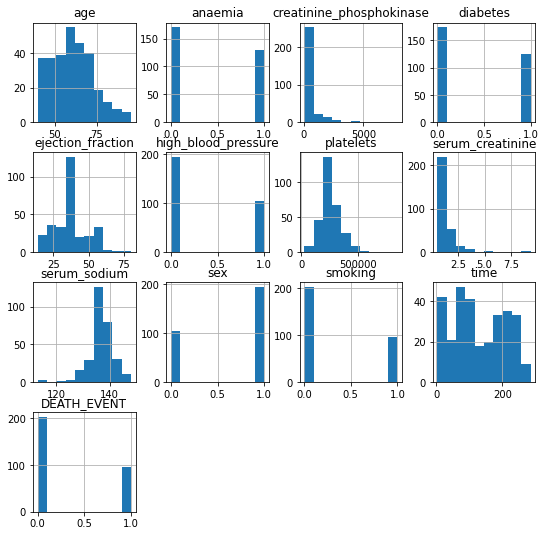

In [ ]:
dataset.hist(figsize=(9, 9))

In [ ]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
dataset.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
X = dataset.iloc[:,1:12]


In [ ]:
y = dataset.DEATH_EVENT



In [ ]:
X = dataset.iloc[:,1:12]
y = dataset.DEATH_EVENT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = dataset.DEATH_EVENT, random_state=0)

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy',  metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train,epochs=250, batch_size=10)
y_pred = model.predict(X_test)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/250
23/23 [==============================] - 1s 2ms/step - loss: 168.8832 - accuracy: 0.6161
Epoch 2/250
23/23 [==============================] - 0s 2ms/step - loss: 148.8307 - accuracy: 0.5491
Epoch 3/250
23/23 [==============================] - 0s 2ms/step - loss: 114.3667 - accuracy: 0.6250
Epoch 4/250
23/23 [==============================] - 0s 4ms/step - loss: 145.5378 - accuracy: 0.6116
Epoch 5/250
23/23 [==============================] - 0s 4ms/step - loss: 139.2796 - accuracy: 0.5179
Epoch 6/250
23/23 [==============================] - 0s 4ms/step - loss: 121.3503 - accuracy: 0.5848
Epoch 7/250
23/23 [==============================] - 0s 4ms/step - loss: 133.5271 - accuracy: 0.5893
Epoch 8/250
23/23 [==============================] - 0s 4ms/step - loss: 114.5819 - accuracy: 0.5714
Epoch 9/250
23/23 [==============================] - 0s 3ms/step - loss: 116.9681 - accuracy: 0.5804
Epoch 10/250
23/23 [==============================] - 0s 3ms/step - loss: 126.4010 - accura